In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts


In [2]:
data= pd.read_csv("insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [33]:
corr = data.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

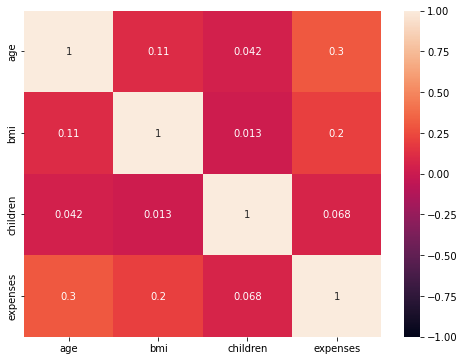

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True,vmin=-1,vmax=1)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


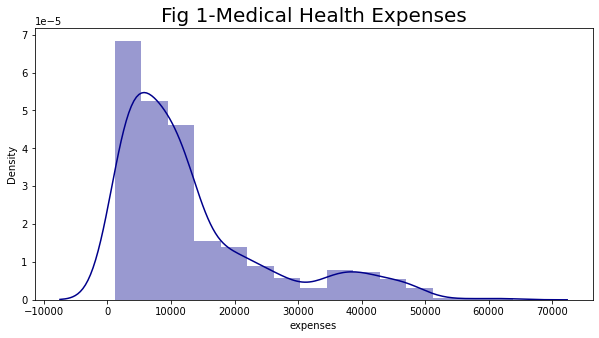

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(data['expenses'],bins=15,color='darkblue')
plt.title("Fig 1-Medical Health Expenses", fontsize=20)
plt.show()

In [ ]:
# In Fig 1,we can clearly see here that the distribution of expenses is rightly skewed. 
# They show variation ranging from $1121 to $63770 in the given plot for dataset of 1338 current health insurers.

In [37]:
def agee(X):
    if X in range(18,20):
        return '18-20'
    if X in range(20,30):
        return '20-30'
    if X in range(30,40):
        return '30-40'
    if X in range(40,50):
        return '40-50'
    elif X in range(50,60):
        return '50-60'
    else:
        return '60+'

In [39]:
df=data.copy()
df['age_c']=df['age'].apply(agee)

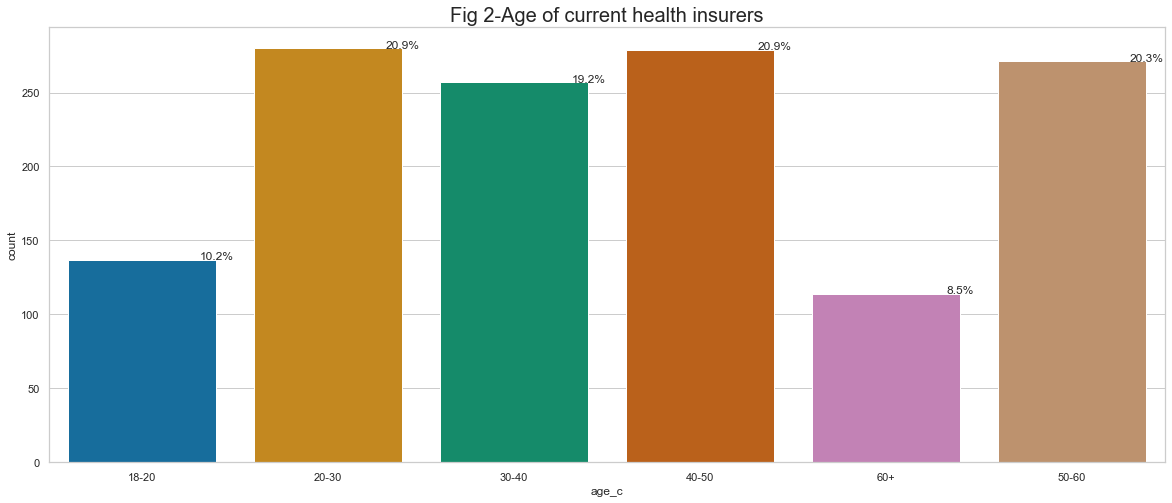

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(df))
ax = sns.countplot(x="age_c", data=df,palette="colorblind")
plt.title('Fig 2-Age of current health insurers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#In Fig 2, the age has been put in age bin category for clearer visuals, and from the countplot below one 
#can make out that age group of 20-30 and 40-50 each, make about 30 per cent of the current health insurers.
#This could be accounted for the fact that todays younger generation is more aware about the importance 
#of purchasing health insurances, whilst for 40-50 age group, they consist of the older generation,
#that are more prone to health issues henceforth its justified.

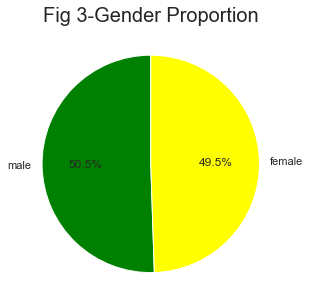

In [41]:
plt.figure(figsize=(18,5))
male = (df["sex"] == "male").sum()
female = (df["sex"]=="female").sum()
prop =[male,female]
plt.pie(prop,labels=["male","female"],shadow = False,colors= ['green','yellow'],startangle=90,autopct='%1.1f%%')
plt.title("Fig 3-Gender Proportion",fontsize=20)

plt.show()

In [ ]:
#In Fig 3, one can see a kind of a balanced dataset as the proportion of males is only 1 per cent higher then 
#that of females.

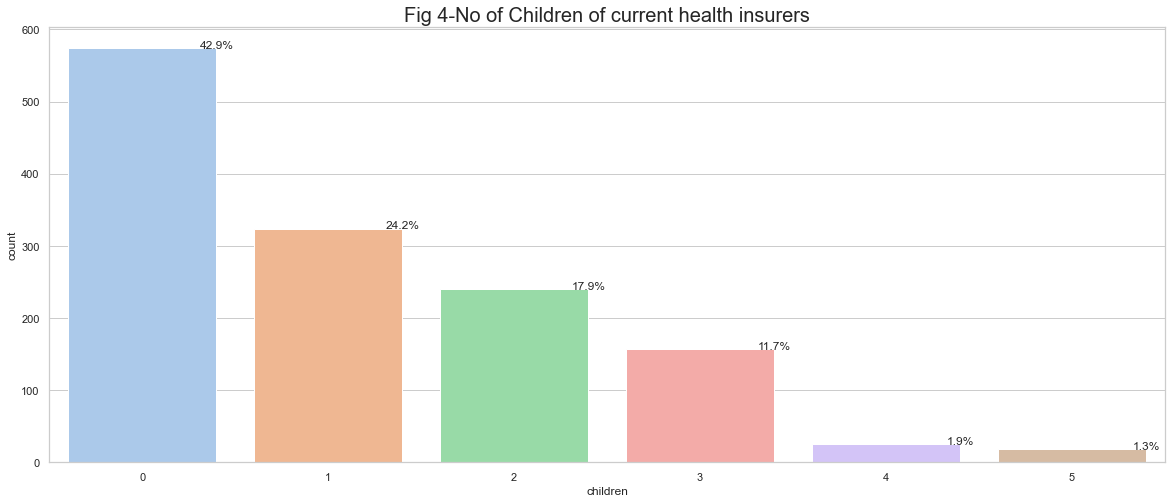

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(df))
ax = sns.countplot(x="children", data=df,palette="pastel")
plt.title('Fig 4-No of Children of current health insurers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#In Fig 4,out of the total people who had current medical insurance expenses as listed in this dataset, 
#around 42.9 per cent of them have no children. 

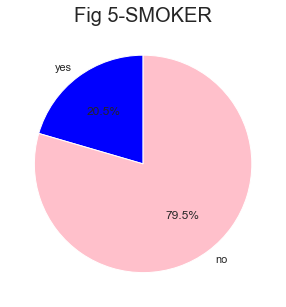

In [44]:
plt.figure(figsize=(18,5))
yes = (df["smoker"] == "yes").sum()
no = (df["smoker"]=="no").sum()
prop =[yes,no]
plt.pie(prop,labels=["yes","no"],shadow = False,colors= ['blue','pink'],startangle=90,autopct='%1.1f%%')
plt.title("Fig 5-SMOKER",fontsize=20)
plt.show()

In [ ]:
#In Fig 5, the dataset consisted of an imbalanced ratio of 79.5 per cent people who have current medical insurance 
#expenses to be non-smokers whilst 20.5 per cent were smokers.

In [45]:
def BMI(BMI):
    if BMI<=18.5:
        return "UNDERWEIGHT"
    elif BMI<=24.9:
        return "NORMAL WEIGHT"
    elif BMI<=29.9:
        return "OVERWEIGHT"
    else:
        return "OBESE"

In [46]:
df['BMI']=df['bmi'].apply(BMI)

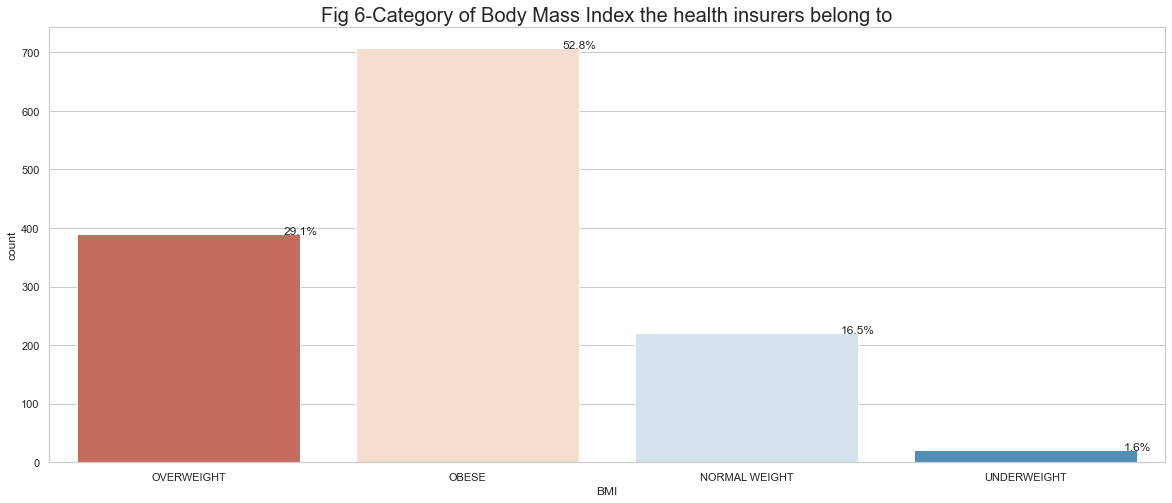

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(df))
ax = sns.countplot(x ="BMI", data=df,palette="RdBu")
plt.title("Fig 6-Category of Body Mass Index the health insurers belong to", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#In Fig 6, the countplot suggests that body mass index (BMI)which have been put into categorical bins for a 
#clearer understanding, show that the obese people are the highest in number to have current medical insurance 
#expenses which makes sense as high BMI is typically associated with higher risk of chronic disease.

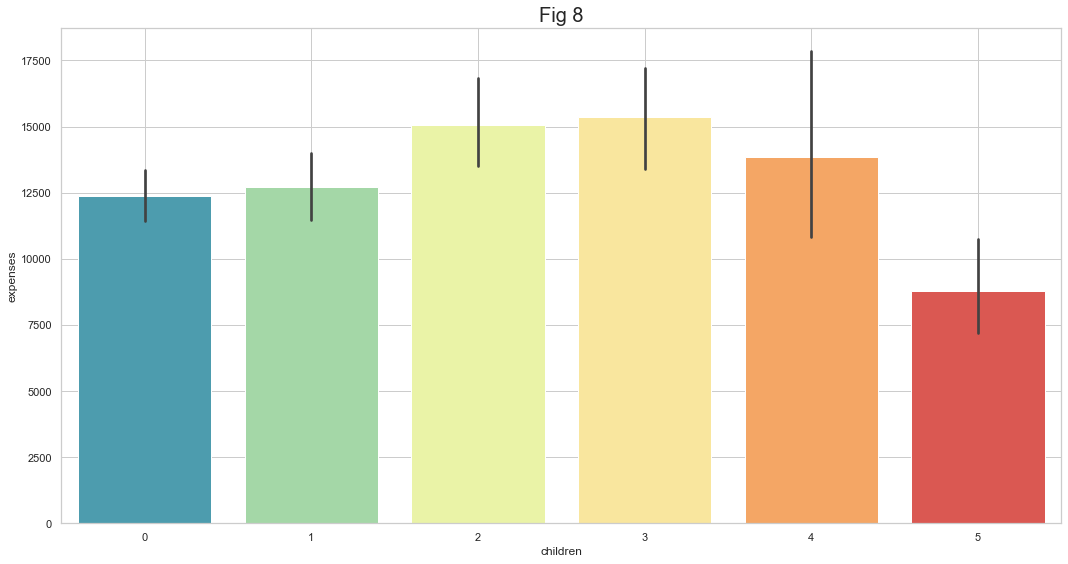

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x='children',y='expenses',data=df,palette='Spectral_r',saturation=0.9)
plt.title("Fig 7", fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:

#In Fig 7, the plot gives us an undertsanding that people who have 2 and 3 children consisted of having higher 
#medical expenses throughout as compared to having more or less children then that.

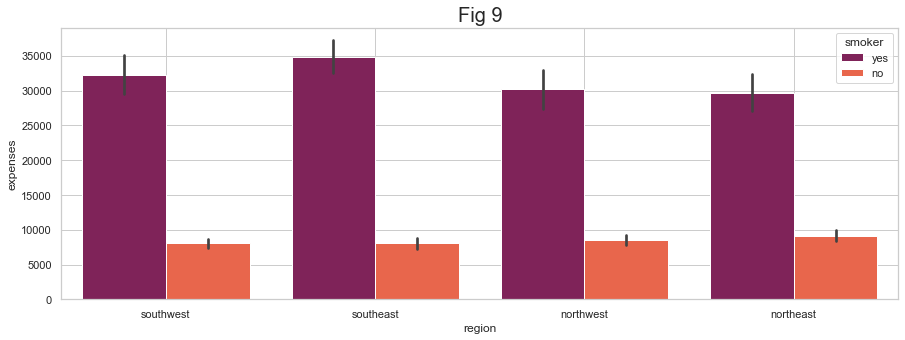

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x='region',y='expenses',hue = "smoker",data=df,saturation=0.9,palette="rocket")
plt.title("Fig 8", fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
#In Fig 8,the south east region have the highest medical insurance expenses as people who smoke in the northeast 
#is the highest as compared to thier counterparts.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

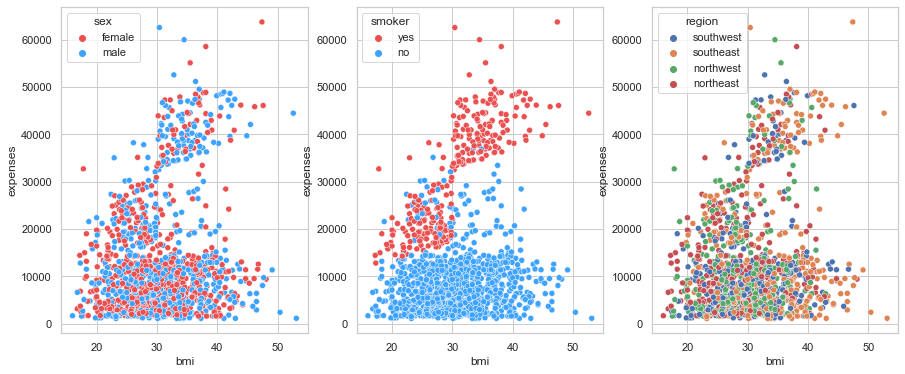

In [59]:
palette=['#EB5050','#3EA2FF']

fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=df,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=df,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=df,hue='region')


In [ ]:
#for bmi expense plot in the category of sex the distributionn of expense is equal in male and female,
# in the smoker category we can see that the expense is higer for smoker than non smoker in all the bmi group
# in the region wise the expense is also divide equally.

Text(0.5, 1.0, 'Fig 10')

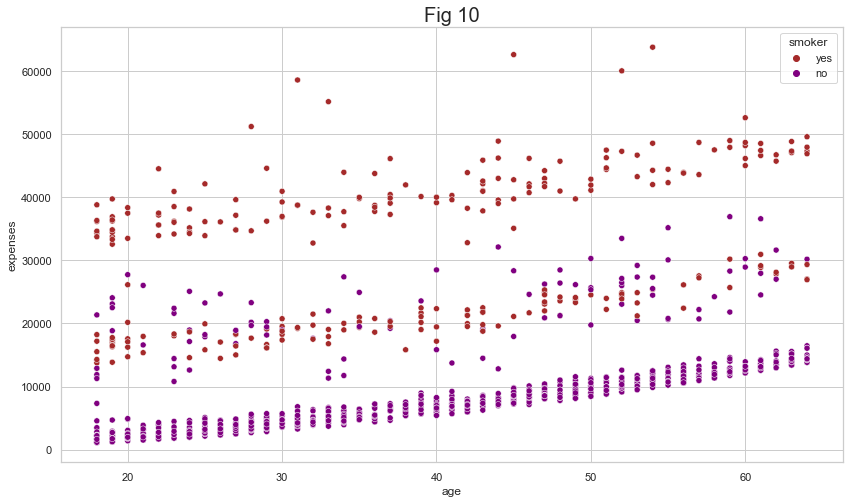

In [53]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='age', y='expenses',hue="smoker",palette=['brown','purple'])
plt.title("Fig 10", fontsize=20)

In [ ]:
#In Fig 10,for the age-expenses plot we see that smokers tend to pay more than non-smokers but the line slope 
#seems almost the same, implying that the increase of medical expenses with respect to the age is the same for 
#both categories.

Text(0.5, 1.0, 'Fig 11')

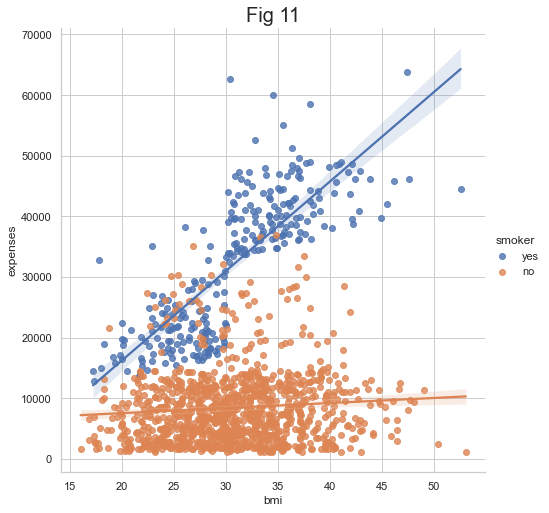

In [54]:
sns.lmplot(data=df, x='bmi', y='expenses',hue="smoker",height = 7) 
plt.title("Fig 11", fontsize=20)

In [ ]:
#In Fig 11, for the bmi-expenses plot  we see that smokers pay more than non-smokers but here the line slope 
#is much higher, resulting in a massive medical expenses increase when the bmi raises.
#The scatterplot above suggests that body mass index (BMI) and expenses are positively correlated, 
#where customers with higher BMI typically also tend to pay more in insurance premium.

In [6]:
numerical=[feature for feature in data.columns if data[feature].dtype !='O' ]

In [7]:
numerical

['age', 'bmi', 'children', 'expenses']

In [8]:
data[numerical]

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


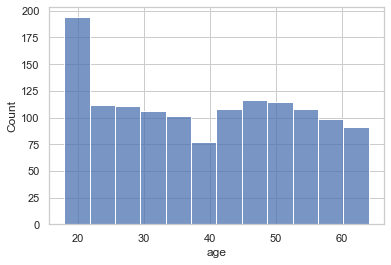

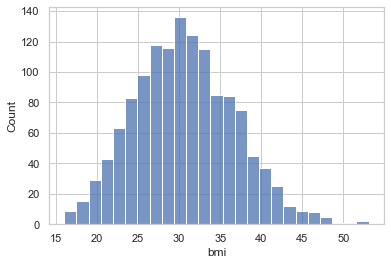

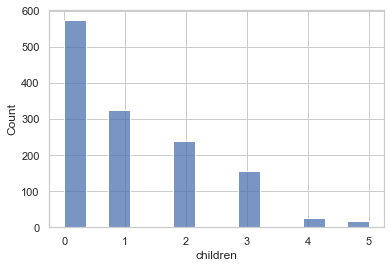

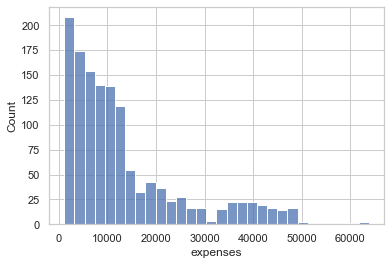

In [61]:
for feature in numerical:
    sns.histplot(data=data,x=feature)
    #sns.hist(data[feature])
    plt.xlabel(feature)
    plt.show()

In [ ]:
# Here we see the distribution of all the numerical columns
# The bmi and age shows the normal distribution
# the expenses is postive skewed so the mean value will be grater than median

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [11]:
data['expense_cat'] = pd.cut(data['expenses'],
                            bins=[1000,10000,20000,30000,40000,np.inf],
                            labels=[1,2,3,4,5])

In [12]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [13]:
for train_e_index,test_e_index in split.split(data,data['expense_cat']):
    train_e = data.loc[train_e_index]
    test_e = data.loc[test_e_index]

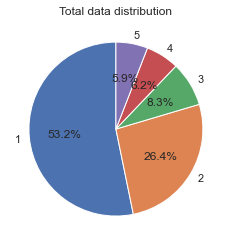

In [63]:

plt.pie(data.expense_cat.value_counts(),labels=data.expense_cat.value_counts().index,startangle=90,autopct='%1.1f%%')
plt.title('Total data distribution')
plt.show()


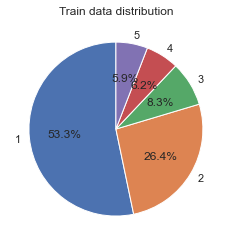

In [64]:
plt.pie(train_e.expense_cat.value_counts(),labels=train_e.expense_cat.value_counts().index,startangle=90,autopct='%1.1f%%')
plt.title('Train data distribution')
plt.show()


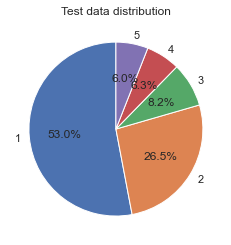

In [65]:
plt.pie(test_e.expense_cat.value_counts(),labels=test_e.expense_cat.value_counts().index,startangle=90,autopct='%1.1f%%')
plt.title('Test data distribution')
plt.show()


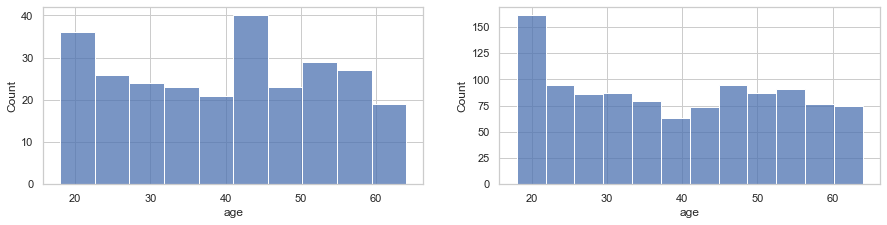

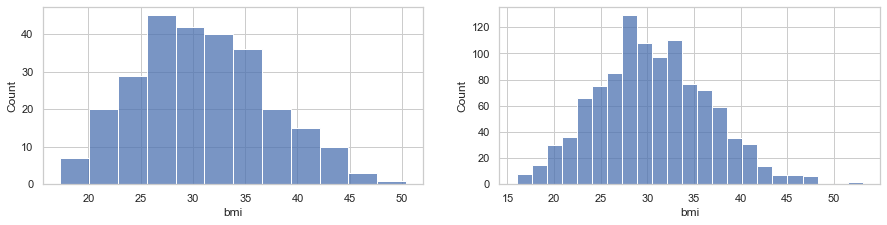

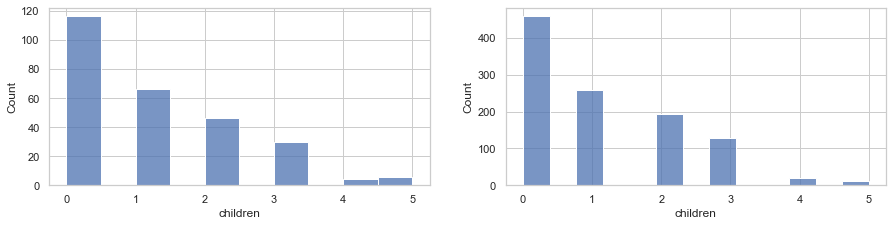

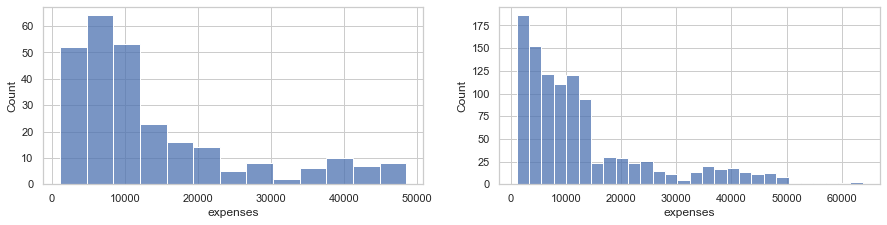

In [66]:
i=1

for feature in numerical:
    plt.figure(figsize=(15,15))
    plt.subplot(4,2,i)
    sns.histplot(data=test_e,x=feature)
    #plt.hist(test_e[feature])
    i=i+1
    plt.subplot(4,2,i)
    sns.histplot(data=train_e,x=feature)
    #plt.hist(train_e[feature])
    plt.show()
    i=i+1
    

In [ ]:
#Train and test data are now almost equally distributed in all the features